In [45]:
%load_ext autoreload
%autoreload 2

from t_nachine.optimization import Analyzer
import pandas as pd
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
path = "logs/bounce.csv"
df = pd.read_csv(path)

In [29]:
analyzer = Analyzer(df)

In [30]:
analyzer.win_rate

0.38353008926000576

In [41]:
analyzer.losing_streak_probability(n=4)

0.144

In [38]:
analyzer.winning_streak_probability(n=2)

0.147

In [77]:
analyzer.stats

Duration                         RiskToReward                 \
                 mean median min   max    std         mean median     min   
WinningTrade                                                                
False          13.736  7.000   0  1854 24.308       -1.045 -1.000 -16.429   
True           23.185 15.000   0  1068 31.244        2.039  2.000   0.010   

                           
                max   std  
WinningTrade               
False        -0.000 0.303  
True         17.378 0.365

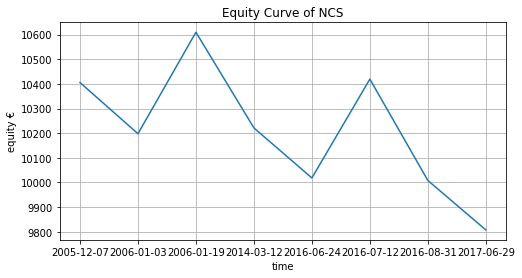

In [83]:
analyzer.plot_equity_curve()

In [84]:
def compute_cohots(price: float) -> int:
    
    if price <= 5:
        return 1
    
    if price <= 10:
        return 2
    
    if price <= 50:
        return 3
    
    if price <= 100:
        return 4
    
    if price <= 500:
        return 5
    
    if price <= 1000:
        return 6

    return 7

In [85]:
results = analyzer.backtest_results

In [86]:
results['cohorts'] = results.EntryPrice.apply(compute_cohots)

In [87]:
results.groupby('cohorts').size()

cohorts
1     3425
2     7355
3    38122
4     7458
5     2370
6      152
7      159
dtype: int64

In [88]:
results.groupby('cohorts').WinningTrade.mean()

cohorts
1   0.439
2   0.408
3   0.377
4   0.376
5   0.359
6   0.395
7   0.390
Name: WinningTrade, dtype: float64

In [89]:
results.groupby('cohorts').Duration.mean()

cohorts
1   19.868
2   19.813
3   17.231
4   15.325
5   15.093
6   15.289
7   12.031
Name: Duration, dtype: float64

100%|█████████████████████████████████████████| 100/100 [01:37<00:00,  1.03it/s]


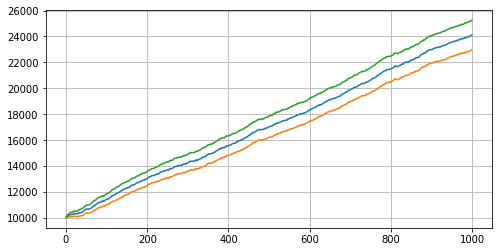

In [64]:
analyzer.plot_simulated_equity_curve(capital=10_000,
                                     nb_simulations=100)

In [74]:
analyzer.ruin_probability(nb_simulations=200, ruin_level=1.00)

100%|█████████████████████████████████████████| 200/200 [03:26<00:00,  1.03s/it]


0.754